In [1]:
# Import the necessary libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Load the dataset.
# Assuming the file is a CSV and is named 'human_cognitive_performance.csv'
# If your filename is different, replace it in the quotes below.

file_name = 'human_cognitive_performance.csv'

try:
    df = pd.read_csv(file_name)
    print(f"Successfully loaded {file_name}")
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found. Please ensure it is in the same directory as this notebook.")

# Display the first few rows to confirm loading and inspect the data structure
print("\nFirst 5 rows of the dataset:")
display(df.head())

# Display column information to check data types and look for missing values
print("\nData information (column types and non-null counts):")
df.info()

Successfully loaded human_cognitive_performance.csv

First 5 rows of the dataset:


,User_ID,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score
0,U1,57,Female,6.5,3,Non-Vegetarian,6.5,Medium,41,583.33,65,36.71,39.77
1,U2,39,Female,7.6,9,Non-Vegetarian,10.8,High,214,368.24,58,54.35,57.68
2,U3,26,Male,8.2,6,Vegetarian,5.7,Low,429,445.21,49,32.57,29.54
3,U4,32,Male,7.8,9,Vegetarian,8.3,Low,464,286.33,94,70.15,74.59
4,U5,50,Male,9.7,2,Non-Vegetarian,11.3,Medium,365,237.65,62,87.54,91.78



Data information (column types and non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User_ID             80000 non-null  object 
 1   Age                 80000 non-null  int64  
 2   Gender              80000 non-null  object 
 3   Sleep_Duration      80000 non-null  float64
 4   Stress_Level        80000 non-null  int64  
 5   Diet_Type           80000 non-null  object 
 6   Daily_Screen_Time   80000 non-null  float64
 7   Exercise_Frequency  80000 non-null  object 
 8   Caffeine_Intake     80000 non-null  int64  
 9   Reaction_Time       80000 non-null  float64
 10  Memory_Test_Score   80000 non-null  int64  
 11  Cognitive_Score     80000 non-null  float64
 12  AI_Predicted_Score  80000 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 7.9+ MB


In [2]:
# Check for missing values across all columns
print("Total Missing Values Per Column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Strategy for handling missing values (example: fill numeric missing values with the mean)
# Note: You should decide the best strategy (mean, median, mode, or dropping) 
# based on the severity and nature of the missing data.

# Example: Filling missing numeric columns with the mean (if any were identified)
# numeric_cols = df.select_dtypes(include=np.number).columns
# for col in numeric_cols:
#     if df[col].isnull().sum() > 0:
#         df[col].fillna(df[col].mean(), inplace=True)

# print("\nVerification: Missing values after handling:")
# print(df.isnull().sum().max()) # Should be 0 if all were handled

Total Missing Values Per Column:
Series([], dtype: int64)


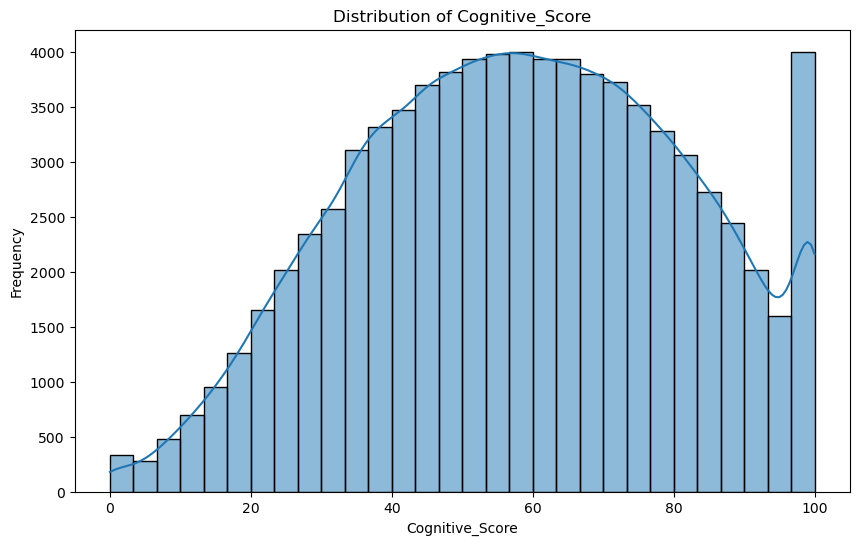

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# *** IMPORTANT: Replace 'Cognitive_Score' below with the EXACT column name from your dataset ***
TARGET_COLUMN = 'Cognitive_Score'

# Visualization 1: Distribution of the Target Variable (Cognitive Score)
plt.figure(figsize=(10, 6))
sns.histplot(df[TARGET_COLUMN], kde=True, bins=30)
plt.title(f'Distribution of {TARGET_COLUMN}')
plt.xlabel(TARGET_COLUMN)
plt.ylabel('Frequency')
plt.show()


Correlation of Numeric Features with the Cognitive_Score:
Cognitive_Score       1.000000
AI_Predicted_Score    0.992358
Memory_Test_Score     0.363894
Sleep_Duration        0.150595
Age                  -0.005976
Caffeine_Intake      -0.122862
Daily_Screen_Time    -0.198515
Stress_Level         -0.227639
Reaction_Time        -0.818470
Name: Cognitive_Score, dtype: float64


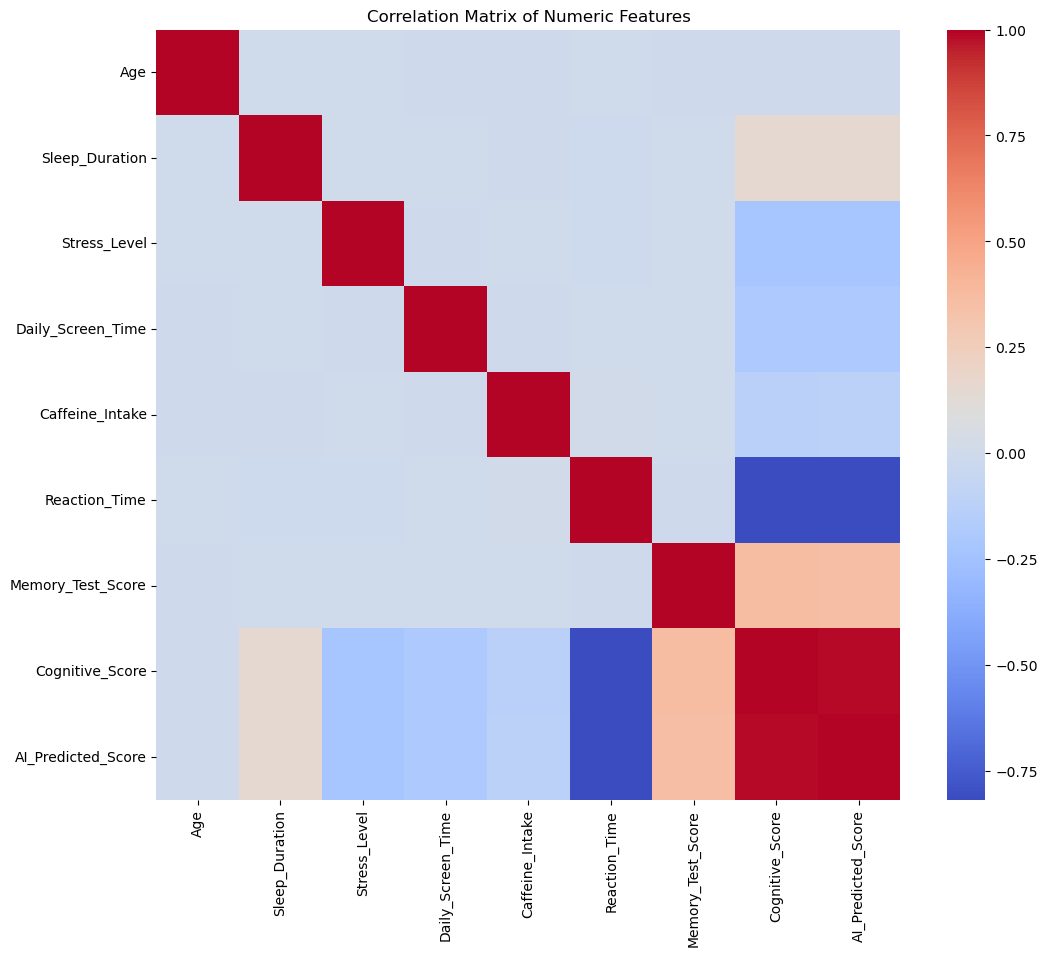

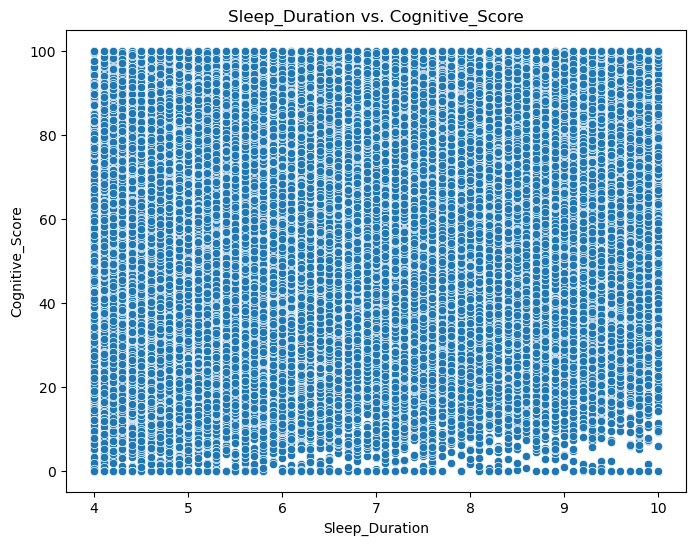

In [4]:
# Select only numeric columns for correlation analysis (assuming your lifestyle factors are numeric)
numeric_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Focus only on correlations with the target variable
target_correlations = correlation_matrix[TARGET_COLUMN].sort_values(ascending=False)

print(f"Correlation of Numeric Features with the {TARGET_COLUMN}:")
print(target_correlations)

# Visualization 2: Correlation Heatmap (Recommended for comprehensive EDA)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Visualization 3: Top predictors (optional, but insightful scatter plot)
# *** IMPORTANT: Replace 'Sleep_Duration' below with one of the strongly correlated numeric columns ***
TOP_PREDICTOR = 'Sleep_Duration' 

if TOP_PREDICTOR in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[TOP_PREDICTOR], y=df[TARGET_COLUMN])
    plt.title(f'{TOP_PREDICTOR} vs. {TARGET_COLUMN}')
    plt.show()